In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, cohen_kappa_score
%matplotlib inline

class_names = ["A", "B", "None"]

In [2]:
train_df = pd.read_csv("working_data/trial_promo_training.csv")
test_df = pd.read_csv("working_data/trial_promo_testing.csv")

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #     print("Normalized confusion matrix")
    # else:
    #     print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Data balancing using equal classes strategy

In [4]:
should_balance = True

In [5]:
number_of_nones = train_df[train_df["decision"] == "None"].shape[0]
nones_df = train_df[train_df["decision"] == "None"]
productA_df = train_df[train_df["decision"] == "A"]
productB_df = train_df[train_df["decision"] == "B"]
print("Number of None's: " + str(nones_df.shape[0]))
print("Increase product A's by: " + str(number_of_nones - productA_df.shape[0]))
print("Increase product B's by: " + str(number_of_nones - productB_df.shape[0]))
print("Number of product A's: " + str(productA_df.shape[0]))
print("Number of product B's: " + str(productB_df.shape[0]))
times_to_increase_productA_df = (number_of_nones - productA_df.shape[0])//productA_df.shape[0]
times_to_increase_productB_df = (number_of_nones - productB_df.shape[0])//productB_df.shape[0]

Number of None's: 621
Increase product A's by: 521
Increase product B's by: 592
Number of product A's: 100
Number of product B's: 29


In [6]:
if should_balance:
    repeated_product_A = [productA_df] * times_to_increase_productA_df
    repeated_product_B = [productB_df] * times_to_increase_productB_df
    repeated_product_A_df = pd.concat(repeated_product_A)
    repeated_product_B_df = pd.concat(repeated_product_B)
    dfs_to_concat = [nones_df, repeated_product_A_df, repeated_product_B_df]
    train_df = pd.concat(dfs_to_concat)
    train_df = train_df.sample(frac=1).reset_index(drop=True)
    print("New # rows: " + str(train_df.shape[0]))
    train_df.head()
else:
    print("Training data will not be balanced")

New # rows: 1701


In [7]:
features_to_scale = ["age", "income", "avbal", "avtrans"]
columns_to_drop_for_nn = ["sexNum", "mstatusNum", "occupationNum", "educationNum", "childrenNum"]
min_max_scaler = preprocessing.MinMaxScaler()
train_df[features_to_scale] = min_max_scaler.fit_transform(train_df[features_to_scale])

train_df.head()

,age,income,avbal,avtrans,decision,sexNum,mstatusNum,occupationNum,educationNum,childrenNum,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.447042,0.365476,0.396965,0.267523,A,0,1,5,3,2,...,0,0,0,0,1,0,0,1,0,0
1,0.316162,0.097377,0.170239,0.095915,A,0,1,0,2,3,...,0,0,0,1,0,0,0,0,1,0
2,0.245310,0.254625,0.299507,0.279150,A,1,1,3,3,2,...,0,0,0,0,1,0,0,1,0,0
3,0.144300,0.379345,0.250381,0.319851,B,0,0,4,0,3,...,0,1,0,0,0,0,0,0,1,0
4,0.111688,0.120073,0.273538,0.324016,A,1,1,1,2,0,...,0,0,0,1,0,1,0,0,0,0


In [8]:
X_train = train_df.loc[:, train_df.columns != "decision"]
X_train = X_train.drop(columns_to_drop_for_nn, axis=1)
y_train = train_df["decision"].replace("A", 0).replace("B", 1).replace("None", 2)
X_train.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.447042,0.365476,0.396965,0.267523,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0.316162,0.097377,0.170239,0.095915,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.245310,0.254625,0.299507,0.279150,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.144300,0.379345,0.250381,0.319851,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0.111688,0.120073,0.273538,0.324016,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [9]:
y_train.head()

0    0
1    0
2    0
3    1
4    0
Name: decision, dtype: int64

In [10]:
test_df[features_to_scale] = min_max_scaler.transform(test_df[features_to_scale])
test_df.head()

X_test = test_df.loc[:, test_df.columns != "decision"]
X_test = X_test.drop(columns_to_drop_for_nn, axis=1)
y_test = test_df["decision"].replace("A", 0).replace("B", 1).replace("None", 2)
X_test.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.704906,0.080506,0.063522,0.100964,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
1,0.139105,0.088530,0.232708,0.122881,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0.514719,0.300505,0.338760,0.089771,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.148052,0.346235,0.180242,0.390105,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,0.425830,0.556900,0.231039,0.484708,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


# Build different models

### Neural network

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Training Performance

In [12]:
clf = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 8, 4), random_state= 42)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)

training accuracy: 0.8336272780717225


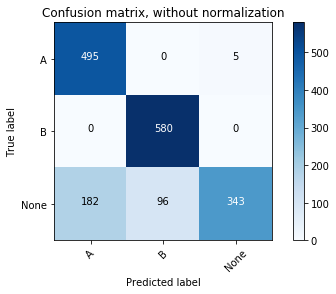

In [13]:
cnf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

print("training accuracy:", accuracy_score(y_train, y_train_pred))

### Testing Performance

accuracy: 0.6
kappa score: 0.2746053853296193


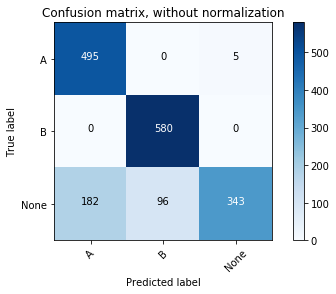

In [14]:
y_test_pred = clf.predict(X_test)

cnf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

print("accuracy:", accuracy_score(y_test, y_test_pred))
print("kappa score:", cohen_kappa_score(y_test, y_test_pred))

In [15]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[0,1,2])
score_dict = {
  "precision": precision.round(4),
  "recall": recall.round(4),
  "f1-score": fscore.round(4),
  "support": support
}
score_df = pd.DataFrame(score_dict, index=class_names)
score_df

,precision,recall,f1-score,support
A,0.3297,0.9091,0.4839,33
B,0.1750,0.7000,0.2800,10
None,0.9496,0.5459,0.6933,207


## Random forest classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
columns_for_rf = ["age", "income", "avbal", "avtrans", "sexNum", "mstatusNum", "occupationNum", "educationNum", "childrenNum"]
X_train_rf = train_df[columns_for_rf]
y_train_rf = train_df["decision"].replace("A", 0).replace("B", 1).replace("None", 2)

X_train_rf.head()

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,age,income,avbal,avtrans,sexNum,mstatusNum,occupationNum,educationNum,childrenNum
0,0.447042,0.365476,0.396965,0.267523,0,1,5,3,2
1,0.316162,0.097377,0.170239,0.095915,0,1,0,2,3
2,0.245310,0.254625,0.299507,0.279150,1,1,3,3,2
3,0.144300,0.379345,0.250381,0.319851,0,0,4,0,3
4,0.111688,0.120073,0.273538,0.324016,1,1,1,2,0


In [17]:
clf = RandomForestClassifier(max_depth=2, random_state=42, n_estimators=1000)
clf.fit(X_train_rf, y_train_rf)

y_train_pred = clf.predict(X_train_rf)
print(y_train_pred)

[0 0 0 ... 2 2 0]


### Training Performance

training accuracy: 0.7865961199294532


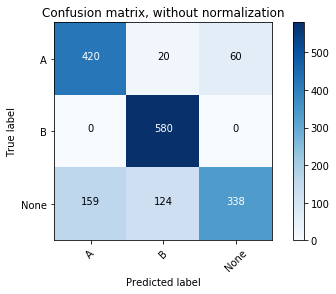

In [19]:
cnf_matrix = confusion_matrix(y_train_rf, y_train_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

print("training accuracy:", accuracy_score(y_train, y_train_pred))

### Testing Performance

accuracy: 0.64
kappa score: 0.3322649572649572


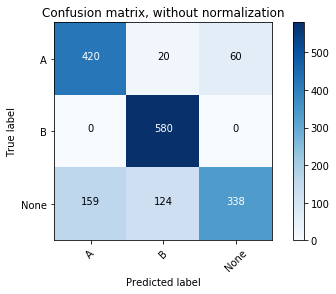

In [23]:
X_test_rf = test_df[columns_for_rf]
y_test_rf = test_df["decision"].replace("A", 0).replace("B", 1).replace("None", 2)

y_test_pred = clf.predict(X_test_rf)

cnf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

print("accuracy:", accuracy_score(y_test, y_test_pred))
print("kappa score:", cohen_kappa_score(y_test, y_test_pred))

In [24]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test_rf, y_test_pred, labels=[0, 1, 2])
score_dict = {
  "precision": precision.round(4),
  "recall": recall.round(4),
  "f1-score": fscore.round(4),
  "support": support
}
score_df = pd.DataFrame(score_dict, index=[0, 1, 2])
score_df

,precision,recall,f1-score,support
0,0.3836,0.8485,0.5283,33
1,0.1923,1.0000,0.3226,10
2,0.9760,0.5894,0.7349,207


### Build a neural network using Keras

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
# fix random seed for reproducibility
np.random.seed(42)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [26]:
X_train.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.447042,0.365476,0.396965,0.267523,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0.316162,0.097377,0.170239,0.095915,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.245310,0.254625,0.299507,0.279150,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.144300,0.379345,0.250381,0.319851,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0.111688,0.120073,0.273538,0.324016,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [27]:
# create model
num_features = X_train.shape[1]
model = Sequential()
model.add(Dense(num_features, input_dim=num_features, activation='relu', init='uniform'))
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(6, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                290       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 66        
_________________________________________________________________
batch_normalization_2 (Batch (None, 6)                 24        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
__________

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(28, input_dim=28, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [28]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=3)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes=3)

In [30]:
es = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=50, verbose=0, mode='auto', baseline=None)
checkpoint = ModelCheckpoint('models/model-{epoch:03d}-{val_acc:.2f}.h5', verbose=0, monitor='val_acc',save_best_only=True, mode='auto')  

In [31]:
history = model.fit(X_train, y_train_one_hot, epochs=500, batch_size=50, verbose=0, validation_data = (X_test, y_test_one_hot), callbacks = [es, checkpoint])

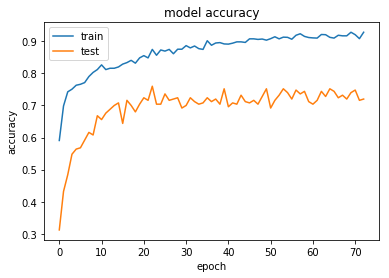

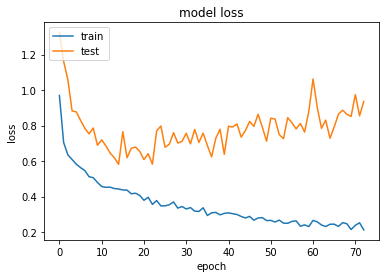

In [32]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Training confusion matrix and accuracy

accuracy: 0.9523809523809523


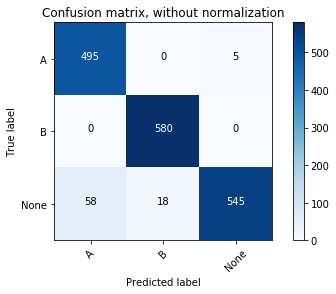

In [42]:
keras_nn_predictions_train = model.predict(X_train)
keras_nn_predictions_train = np.argmax(keras_nn_predictions_train, axis=1)

cnf_matrix = confusion_matrix(y_train, keras_nn_predictions_train)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

print("accuracy:", accuracy_score(y_train, keras_nn_predictions_train))

### Testing confusion matrix and accuracy

In [38]:
X_test.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.704906,0.080506,0.063522,0.100964,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
1,0.139105,0.088530,0.232708,0.122881,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0.514719,0.300505,0.338760,0.089771,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.148052,0.346235,0.180242,0.390105,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,0.425830,0.556900,0.231039,0.484708,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [39]:
# evaluate the model
scores = model.evaluate(X_test, y_test_one_hot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

250/250 [==============================] - 0s 25us/step

acc: 72.00%


accuracy: 0.72
kappa score: 0.24170205390415112


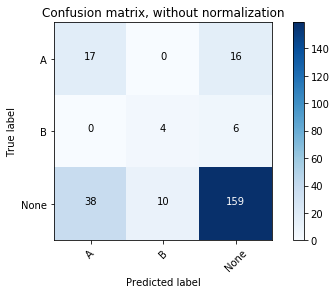

In [41]:
keras_nn_predictions = model.predict(X_test)
keras_nn_predictions = np.argmax(keras_nn_predictions, axis=1)

cnf_matrix = confusion_matrix(y_test, keras_nn_predictions)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

print("accuracy:", accuracy_score(y_test, keras_nn_predictions))
print("kappa score:", cohen_kappa_score(y_test, keras_nn_predictions))

In [43]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, keras_nn_predictions, labels=[0, 1, 2])
score_dict = {
  "precision": precision.round(4),
  "recall": recall.round(4),
  "f1-score": fscore.round(4),
  "support": support
}
score_df = pd.DataFrame(score_dict, index=class_names)
score_df

,precision,recall,f1-score,support
A,0.3091,0.5152,0.3864,33
B,0.2857,0.4000,0.3333,10
None,0.8785,0.7681,0.8196,207


# Save the best model for later usage

In [44]:
model.save('models/NN_72_00.h5')

### Load the model and check

In [45]:
model_name = "NN_72_00.h5"

In [48]:
from keras.models import load_model
model = load_model('models/'+model_name)
keras_nn_predictions = model.predict(X_test)
keras_nn_predictions = np.argmax(keras_nn_predictions, axis=1)
cm = confusion_matrix(y_test, keras_nn_predictions)

print("accuracy:", accuracy_score(y_test, keras_nn_predictions))
print("kappa score:", cohen_kappa_score(y_test, keras_nn_predictions))

accuracy: 0.72
kappa score: 0.24170205390415112


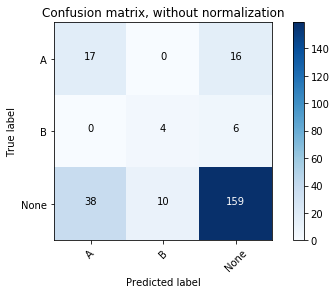

In [47]:
plot_confusion_matrix(cm, classes=["A", "B", "None"],
                      title='Confusion matrix, without normalization')

### This model gives less than 50 % class accuracy on products A and B and predicts it as none